In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
#read in train and shape dfs

path_task = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/probability_discounting/task.csv'
#path_shape = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/probability_discounting/shape.csv'
    
task = pd.read_csv(path_task, index_col=0)
task = pd.DataFrame(data = task)

print(task.shape)

#LP_df = pd.read_csv(path_LP_train, index_col=0)
#LP_df = pd.DataFrame(data = LP_df)

#print(LP_df.shape)

task.head(10)

(907, 17)


,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
0,190729,683,100,choice,0,1,1,0,0.00,1,0.81,1,0.13,NaN,2,1,0
1,190729,683,100,choice,1,1,2,1,1.36,0,0.00,1,0.09,1.0,2,1,0
2,190729,683,100,choice,2,1,1,0,0.00,1,3.27,3,1.39,0.0,2,1,0
3,190729,683,100,choice,3,1,1,0,0.00,1,0.80,1,0.21,8.0,2,1,0
4,190729,683,100,choice,4,1,2,1,1.62,0,0.00,2,0.05,11.0,2,1,0
5,190729,683,100,choice,5,1,2,1,1.13,0,0.00,0,0.00,1.0,2,1,0
6,190729,683,100,choice,6,1,2,1,1.48,0,0.00,0,0.00,14.0,2,1,0
7,190729,683,100,choice,7,1,2,1,1.85,0,0.00,0,0.00,28.0,2,1,0
8,190729,683,100,choice,8,1,2,1,1.12,0,0.00,1,0.21,5.0,2,1,0
9,190729,683,100,choice,9,1,2,1,0.93,0,0.00,0,0.00,3.0,2,1,0


In [4]:
task.groupby('animal_number').size()

animal_number
683    44
684    94
685    94
686    96
687    46
688    47
689    43
690    47
691    48
692    48
693    44
694    24
695    45
696    48
697    47
699    46
700    46
dtype: int64

In [5]:
task.groupby('date')['session'].value_counts()

date    session
190726  100        256
190729  100        510
        75         141
Name: session, dtype: int64

In [5]:
shape_df_no1 = shape_df[shape_df['session'] != 'Shape_1']

In [9]:
task.groupby('session').mean()

,date,animal_number,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
session,,,,,,,,,,,,,,,
75,190729.000000,685.014184,11.262411,2.000000,0.921986,0.35461,1.459574,0.631206,1.267872,1.780142,0.528582,5.193798,1.000000,2.000000,2.0
100,190727.997389,691.031332,11.140992,1.613577,1.415144,0.41906,1.431971,0.524804,1.684817,1.505222,0.551815,5.605714,1.386423,1.613577,0.0


683


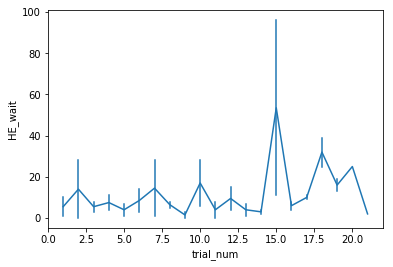

684


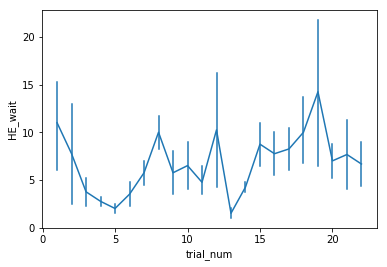

685


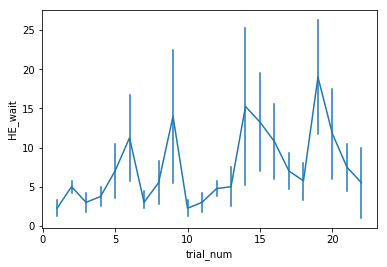

686


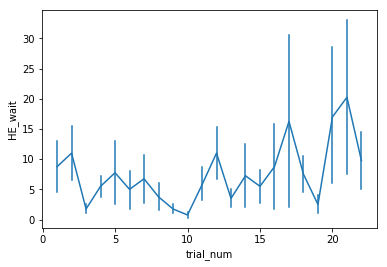

687


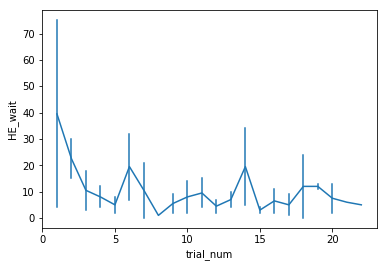

688


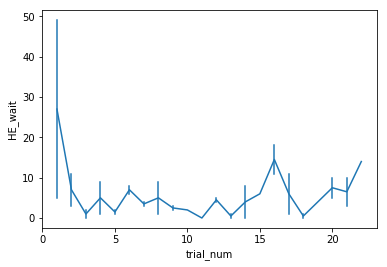

689


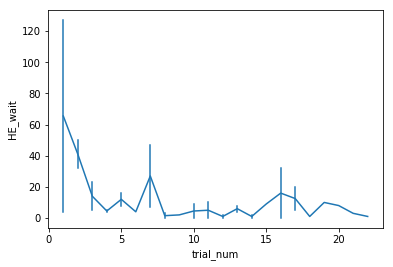

690


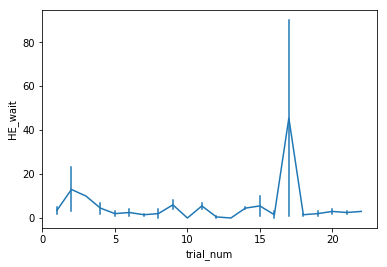

691


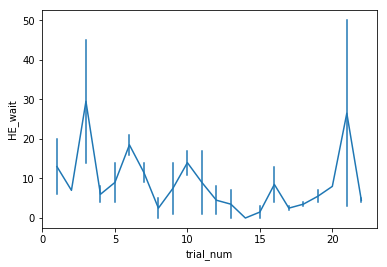

692


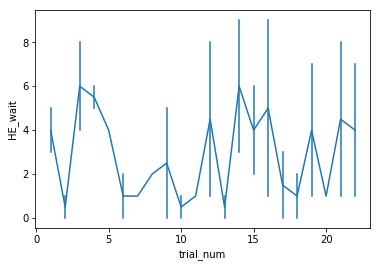

693


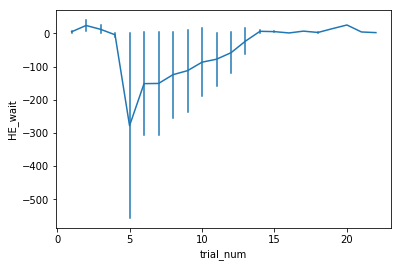

694


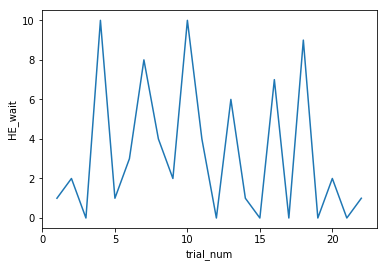

695


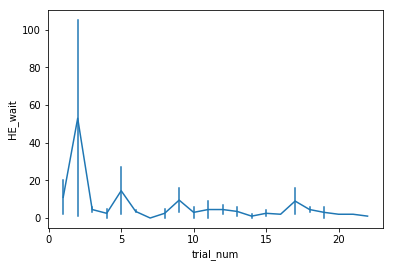

696


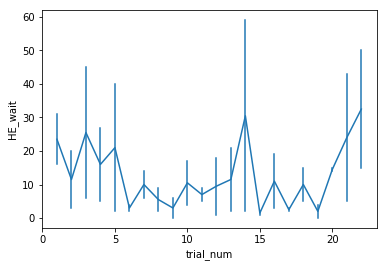

697


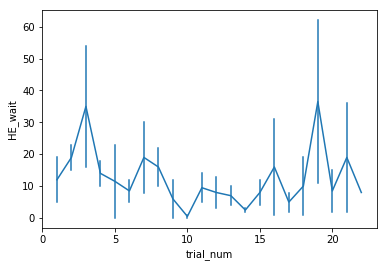

699


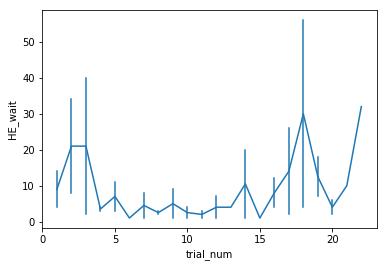

700


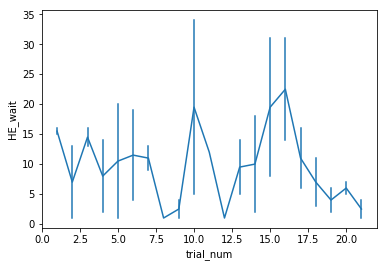

In [7]:
for animal in task['animal_number'].unique():
    print(animal)
    sns.lineplot(x='trial_num', y='HE_wait', data=task[task['animal_number'] == animal], err_style="bars", ci=68)
    plt.show()

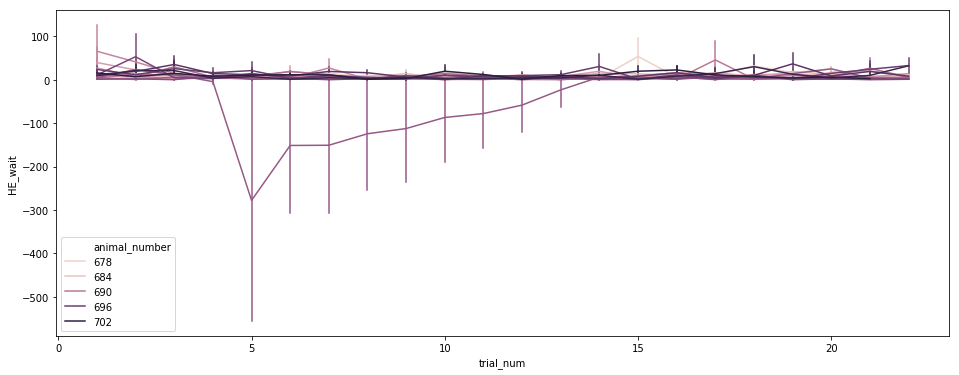

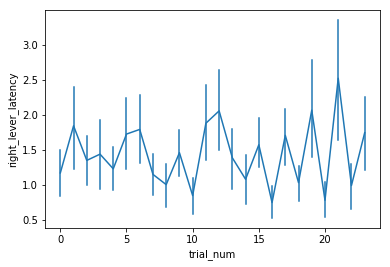

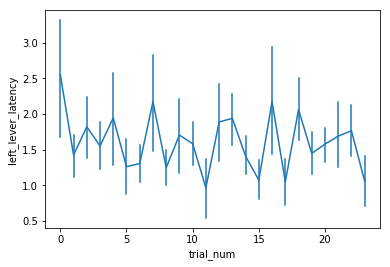

In [11]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='trial_num', y='HE_wait', data=task, err_style="bars", ci=68, hue='animal_number')
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=task, err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=task, err_style="bars", ci=68)

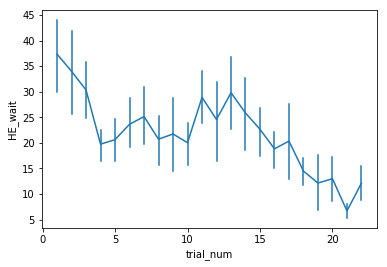

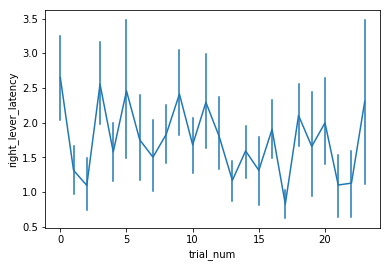

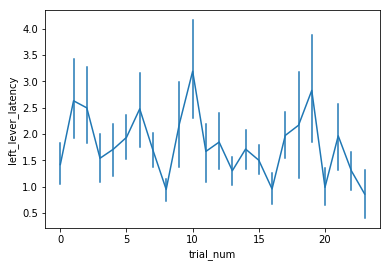

In [7]:
sns.lineplot(x='trial_num', y='HE_wait', data=shape_df_no1[shape_df_no1['session'] == 'Shape_2'], err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=shape_df_no1[shape_df_no1['session'] == 'Shape_2'], err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=shape_df_no1[shape_df_no1['session'] == 'Shape_2'], err_style="bars", ci=68)

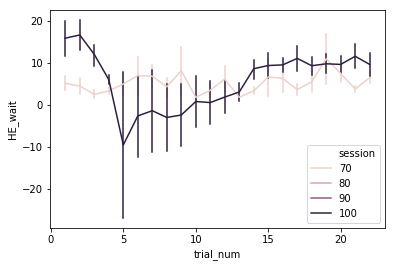

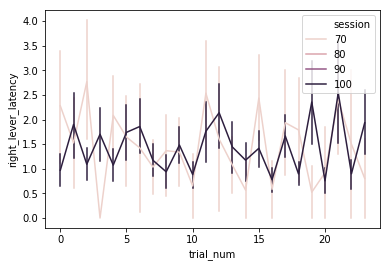

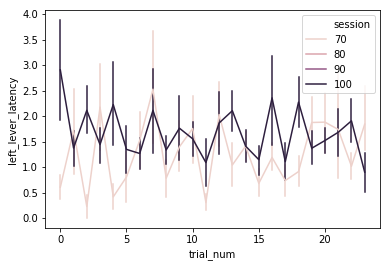

In [12]:
sns.lineplot(x='trial_num', y='HE_wait', data=task, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=task, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=task, hue='session', err_style="bars", ci=68)

In [14]:
path_animal_info = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/PD_round1.xlsx'

animal_info = pd.read_excel(path_animal_info)
animal_info = pd.DataFrame(data = animal_info)

print(animal_info.shape)

animal_info.head(10)

(19, 4)


,animal,high_reward,cage,group
0,684,2,2,1
1,685,2,2,1
2,686,2,2,1
3,693,1,5,1
4,694,1,5,1
5,695,1,5,1
6,696,2,6,2
7,697,1,6,2
8,698,1,6,2
9,682,1,1,2


In [17]:
#add cage info from animal_info df

animals = animal_info['animal'].values

for animal in animals:
    task.loc[task['animal_number'] == animal, 'cage'] = \
    pd.concat([animal_info[animal_info['animal'] == animal]['cage']]*(len(task[task['animal_number'] == animal])), ignore_index=True).values
    
task.head()

ValueError: No objects to concatenate

In [11]:
lp_assign_groupby = shape_df_no1[shape_df_no1['session'] != '100'].groupby(['cage', 'animal_number', 'session']).sum()

lp_assign_groupby['lever_bias'] = lp_assign_groupby['right_lever_count'] \
    / (lp_assign_groupby['right_lever_count'] + lp_assign_groupby['left_lever_count'])

lp_assign_groupby['lever_bias'].head()

cage  animal_number  session
1.0   682            Shape_2    0.382353
                     Shape_3    0.205128
                     Shape_4    0.250000
      683            Shape_2    0.771429
                     Shape_3    0.592593
Name: lever_bias, dtype: float64

In [13]:
lp_assign_groupby.reset_index(inplace=True)

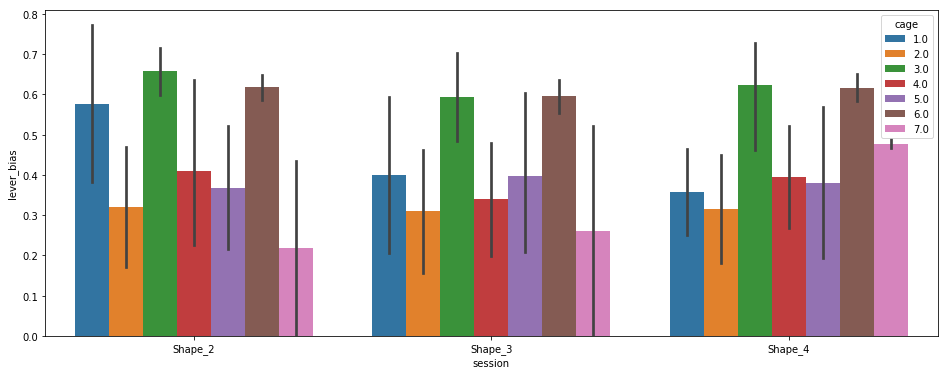

In [14]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='session', y='lever_bias', data=lp_assign_groupby, ci=68, hue='cage')

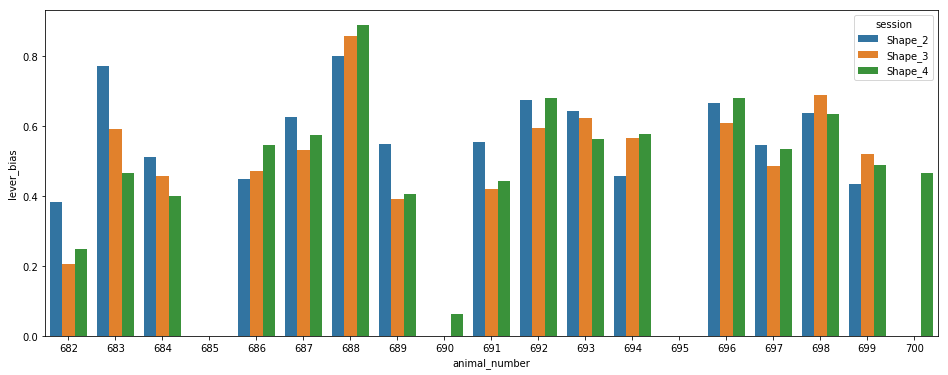

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(x='animal_number', y='lever_bias', data=lp_assign_groupby, ci=68, hue='session')

In [16]:
lp_bias_animal = pd.DataFrame(data = lp_assign_groupby.groupby(['cage', 'animal_number'])['lever_bias'].mean())
lp_bias_animal.head()

lever_bias
cage animal_number            
1.0  682              0.279160
     683              0.609712
2.0  684              0.455927
     685              0.000000
     686              0.489226

In [17]:
lp_bias_animal.reset_index(inplace=True)
lp_bias_animal.head()

,cage,animal_number,lever_bias
0,1.0,682,0.279160
1,1.0,683,0.609712
2,2.0,684,0.455927
3,2.0,685,0.000000
4,2.0,686,0.489226


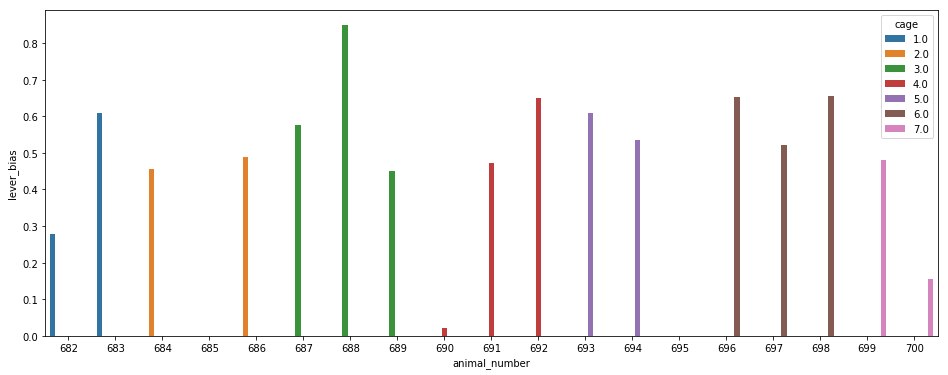

In [18]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='animal_number', y='lever_bias', data=lp_bias_animal, ci=68, hue='cage')

In [19]:
animals = shape_df_no1['animal_number'].unique()

for animal in animals:
    shape_df_no1.loc[shape_df_no1['animal_number'] == animal, 'lever_bias'] = \
    pd.concat([pd.DataFrame(data = lp_bias_animal[lp_bias_animal['animal_number'] == animal]['lever_bias'].values)]*(len(shape_df_no1[shape_df_no1['animal_number'] == animal])), ignore_index=True).values
    
shape_df_no1.head()

,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage,lever_bias
0,190620,682,100,choice,0,1,1,0.0,0.0,1.0,1.15,2,0.05,NaN,2.0,1.0,0.0,1.0,0.27916
1,190620,682,100,choice,1,1,1,0.0,0.0,1.0,1.00,1,0.10,10.0,2.0,1.0,0.0,1.0,0.27916
2,190620,682,100,choice,2,1,1,0.0,0.0,1.0,1.48,1,0.06,3.0,2.0,1.0,0.0,1.0,0.27916
3,190620,682,100,choice,3,1,1,0.0,0.0,1.0,0.85,1,0.14,10.0,2.0,1.0,0.0,1.0,0.27916
4,190620,682,100,choice,4,1,1,0.0,0.0,1.0,0.88,1,0.04,0.0,2.0,1.0,0.0,1.0,0.27916


In [20]:
#split off 100 to split and assign sham and blast cages 
shape_100 = shape_df_no1[(shape_df_no1['session'] == '100')]

shape_last_100 = pd.DataFrame()
animals = animal_info['animal'].values

for animal in animals:
    animal_data = shape_100[shape_100['animal_number']== animal]
    
    animal_dates = animal_data['date'].unique()
    
    animal_last_100 = animal_data[animal_data['date'] == animal_dates[-1]]
    
    shape_last_100 = shape_last_100.append(animal_last_100)

print(shape_last_100.shape)
print(len(shape_last_100['animal_number'].unique()))

(860, 19)
19


In [21]:
shape_last_100.groupby('cage').mean()

,date,animal_number,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,lever_bias
cage,,,,,,,,,,,,,,,,
1.0,190621.000000,682.494624,11.139785,1.000000,1.258065,0.258065,0.778602,0.741935,1.135806,0.655914,0.279247,3.752941,2.000000,1.000000,0.0,0.442659
2.0,190619.330882,685.036765,10.919118,2.000000,1.602941,0.235294,0.638824,0.683824,1.284779,0.897059,0.354044,7.750000,1.000000,2.000000,0.0,0.316821
3.0,190621.000000,687.918699,10.016260,1.650407,1.341463,0.487805,0.898537,0.512195,1.399106,0.577236,0.191220,9.477477,1.349593,1.650407,0.0,0.646544
4.0,190620.299270,691.051095,11.065693,2.000000,1.547445,0.350365,0.905912,0.598540,1.744380,0.613139,0.373504,6.968000,1.000000,2.000000,0.0,0.399898
5.0,190620.671329,694.006993,11.419580,1.000000,1.216783,0.307692,0.740629,0.601399,1.077832,0.755245,0.297762,3.519084,2.000000,1.000000,0.0,0.379831
6.0,190620.000000,696.993007,11.419580,1.335664,1.496503,0.664336,1.434266,0.328671,1.129021,0.538462,0.147622,4.656489,1.664336,1.335664,0.0,0.609421
7.0,190621.000000,699.494118,10.235294,1.505882,1.400000,0.505882,1.262118,0.494118,1.028706,0.541176,0.116706,9.402597,1.494118,1.505882,0.0,0.320599


In [22]:
animals = animal_info['animal'].values

for animal in animals:
    shape_last_100.loc[shape_last_100['animal_number'] == animal, 'group'] = \
    pd.concat([animal_info[animal_info['animal'] == animal]['group']]*(len(shape_last_100[shape_last_100['animal_number'] == animal])), ignore_index=True).values
    
shape_last_100.head()

,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage,lever_bias,group
117,190619,684,100,choice,0,2,2,0.0,0.0,1.0,1.95,0,0.0,NaN,1.0,2.0,0.0,2.0,0.455927,1.0
118,190619,684,100,choice,1,2,2,0.0,0.0,1.0,1.20,0,0.0,25.0,1.0,2.0,0.0,2.0,0.455927,1.0
119,190619,684,100,choice,2,2,2,0.0,0.0,1.0,2.43,0,0.0,33.0,1.0,2.0,0.0,2.0,0.455927,1.0
120,190619,684,100,choice,3,2,2,0.0,0.0,1.0,2.44,0,0.0,2.0,1.0,2.0,0.0,2.0,0.455927,1.0
121,190619,684,100,choice,4,2,2,0.0,0.0,1.0,1.66,0,0.0,20.0,1.0,2.0,0.0,2.0,0.455927,1.0


In [23]:
shape_last_100.groupby(['group']).mean()

,date,animal_number,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage,lever_bias
group,,,,,,,,,,,,,,,,,
1.0,190620.318408,689.109453,10.820896,1.537313,1.385572,0.338308,0.754502,0.601990,1.246144,0.748756,0.284204,6.759563,1.462687,1.537313,0.0,3.373134,0.440120
2.0,190620.478166,692.735808,11.037118,1.497817,1.445415,0.458515,1.111135,0.524017,1.295852,0.585153,0.236179,6.038278,1.502183,1.497817,0.0,4.572052,0.459283


In [55]:
pd_df_session.sort_values('animal_number')

,date,cage,animal_number,group,session,sub_session,high_reward_lever,reinforcement_count,high_reward_lever_count,high_reward_lever_latency_ave,low_reward_lever_count,low_reward_lever_latency_ave
0,190621,1.0,682,2.0,100,choice,right,24,0.0,0.000000,24.0,0.996667
0,190621,1.0,682,2.0,100,force,right,34,11.0,1.480870,12.0,0.499130
0,190621,1.0,683,2.0,100,force,right,33,11.0,1.457273,11.0,1.111818
0,190621,1.0,683,2.0,100,choice,right,26,2.0,0.262083,22.0,1.907083
0,190619,2.0,684,1.0,100,choice,left,38,19.0,1.635263,0.0,0.000000
0,190619,2.0,684,1.0,100,force,left,36,12.0,0.817083,12.0,1.136667
0,190620,2.0,685,1.0,100,choice,left,48,24.0,1.680000,0.0,0.000000
0,190620,2.0,685,1.0,100,force,left,20,10.0,0.644762,0.0,0.000000
0,190619,2.0,686,1.0,100,choice,left,40,16.0,1.560000,8.0,0.980417
0,190619,2.0,686,1.0,100,force,left,36,12.0,1.364583,12.0,1.502917


In [61]:
#make new df with high reward vs low reward columns by session

pd_df_session = pd.DataFrame()

animals = animal_info['animal'].values

for animal in animals:
    
    #get animal data
    animal_data = shape_last_100[shape_last_100['animal_number'] == animal]
    
    #generate session df
    sessions = animal_data['session'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['session'] == session]
        
        for sub in sub_sessions:
            #get sub_session data for animal
            animal_data_sub_session = animal_data_session[animal_data_session['sub_session'] == sub]
            
            pd_df_session_int = pd.DataFrame()
    
            #fill meta data
            pd_df_session_int['date'] = animal_data_sub_session['date'].unique()
            pd_df_session_int['cage'] = animal_data_sub_session['cage'].unique()
            pd_df_session_int['animal_number'] = animal_data_sub_session['animal_number'].unique()
            pd_df_session_int['group'] = animal_data_sub_session['group'].unique()
            pd_df_session_int['session'] = session
            pd_df_session_int['sub_session'] = sub
        
            #compute and fill session data
            if animal_data_sub_session['high_reward_lever'].unique() == 1:
                pd_df_session_int['high_reward_lever'] = 'right'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
        
            elif animal_data_sub_session['high_reward_lever'].unique() == 2:
                pd_df_session_int['high_reward_lever'] = 'left'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
            
            pd_df_session_int['high_reward_prob'] = pd_df_session_int['high_reward_lever_count'] / \
                (pd_df_session_int['high_reward_lever_count'] + pd_df_session_int['low_reward_lever_count']) * 100
            
            pd_df_session = pd_df_session.append(pd_df_session_int)
        
pd_df_session.reset_index(inplace=True, drop=True)    
pd_df_session.head()

,date,cage,animal_number,group,session,sub_session,high_reward_lever,reinforcement_count,high_reward_lever_count,high_reward_lever_latency_ave,low_reward_lever_count,low_reward_lever_latency_ave,high_reward_prob
0,190619,2.0,684,1.0,100,choice,left,38,19.0,1.635263,0.0,0.000000,100.000000
1,190619,2.0,684,1.0,100,force,left,36,12.0,0.817083,12.0,1.136667,50.000000
2,190620,2.0,685,1.0,100,choice,left,48,24.0,1.680000,0.0,0.000000,100.000000
3,190620,2.0,685,1.0,100,force,left,20,10.0,0.644762,0.0,0.000000,100.000000
4,190619,2.0,686,1.0,100,choice,left,40,16.0,1.560000,8.0,0.980417,66.666667


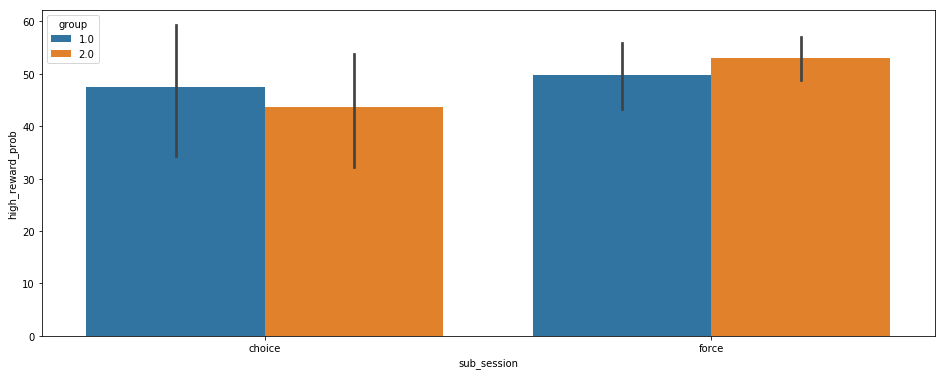

In [65]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='sub_session', y='high_reward_prob', data=pd_df_session, ci=68, hue='group')

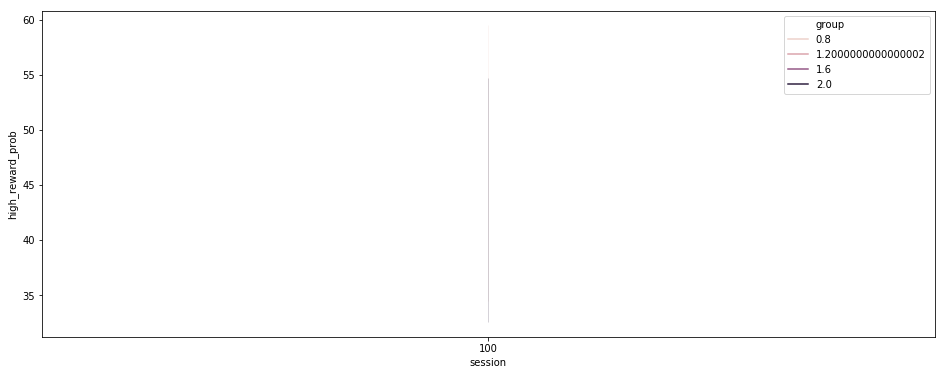

In [68]:
plt.figure(figsize=(16, 6))
g = sns.lineplot(x='session', y='high_reward_prob', data=pd_df_session[pd_df_session['sub_session'] == 'choice'], ci=68, hue='group')